# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Table of contents

1. [General Information](#step1)
2. [Data preprocessing](#step2)
3. [Calculations for new columns](#step3)
4. [Exploratory Data Analysis](#step4)
5. [Overall Conclusion](#step5)

## General Information <a name='step1'></a> 

Let us start by importing the needed libraries and modules

In [1]:
import pandas as pd #imports the pandas library to process dataframes
import matplotlib.pyplot as plt #imports the pyplot module from the matplotlib library to plot graphs
import numpy as np 
#imports the numpy library which adds support for large, multidimensional arrays and matrices

Now let us read the /datasets/vehicles_us.csv file and make it a dataframe and look at the general information

In [2]:
data=pd.read_csv('/datasets/vehicles_us.csv') #this reads the .csv file as a dataframe and saves it as 'data'
data.info(verbose=True)#this gives us general information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We have 13 columns and 51525 rows. We can already spot issues. The 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' columns have missing values. The 'date_posted' column needs to be a date/time type and not int64. 'is_4wd' needs to be boolean

In [3]:
data.head(10) #gives us the first 10 rows of the DataFrame 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


- **Conclusion**

We have read the file and had a general description of the dataframe. We spotted some issues with some of the columns that we are going to try to fix.

## Data preprocessing <a name='step2'></a>

### The 'date_posted' cell

This cell has object type values. This needs to be changed to date/time type. We will use the pd.to_datetime() method. We have taken note of the fact that those dates are written in the format: yyyy-mm-dd. This has to be reflected when using the method. To do this, we will pass a parameter called 'format' and give the value '%Y-%m-%d'

In [4]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
#changes the data type in the date_posted column to date-time type reflecting the existing format
data.info(verbose=True)#general info about the dataframe after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


We have succesfully changed the value type in the column to datetime

### The 'is_4wd' column

The missing values in this column need to be filled and need to be converted into boolean values (True or False). Let us have a look at each unique value in this column

In [5]:
data['is_4wd'].unique() #shows us each unique value in the is_4wd column

array([ 1., nan])

So we have 1 and NaN. This column tells us whether the car is 4wd or not. So 1 should be a 'True' value. We can fill the rest with 0 as 'False' values. After which we can convert the column to a boolean column, 1 will become 'True' and 0 will become 'False'

In [6]:
data['is_4wd'] = data['is_4wd'].where(data['is_4wd'] == 1, 0)
#this inputs 0 in the is_4wd column wherever the value is NOT equal to 1

data['is_4wd'] = data['is_4wd'].astype('bool')
#converts the values of the is_4wd column into boolean values

data['is_4wd'].unique()
#shows us the unique values in the is_4wd column

array([ True, False])

No more missing values and the column has been converted to boolean

### The 'type' column

Let us take a look at the unique values in this column

In [7]:
data['type'].unique() #shows all unique values in the 'type' column

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

We do not have a big issue here. We will just make 'SUV' lowercase. We will do that using the str.lower() method

In [8]:
data['type'] = data['type'].str.lower() 
#this makes all string values in the 'type' column lowercase

data['type'].unique() #shows all unique values in the 'type' column

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

All good!

### The 'odometer' column

This column keeps values that tell us the car's mileage at the time the ad was posted, so the values are numeric. We will try to fill them somehow. Let us look at a numerical description of the column

In [9]:
data['odometer'].describe() #displays a numerical description of the odometer column

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

With such a high standard deviation, we lean towards using the median. However, we can't just blindly replace missing values with the median here because the mileage is dependent on the model year and the condition of the car. So we have to fill the missing odometer values with a median based on its model year and condition. We can create a group our data by 'model_year' and 'condition' and calculate the median mileage of each combination of their values. Then we can apply a function that checks our data for rows for missing odometer values. When it finds one, it will check its model year and condition then return the median odometer value for the model year/condition  combination from our grouped data

In [10]:
mileage_mapper = data.groupby(['model_year', 'condition'])['odometer'].median().to_dict()
#this groups 'data' by model year and condition, and calculates the median odometer readings
# and converts the resulting dataframe into a dictionary called mileage_mapper

def odometer_fill(row): #creates a function called odometer_fill that takes a variable 'row' as argument
    if np.isnan(row['odometer']): #if the value of odometer is missing
        return mileage_mapper.get((row['model_year'], row['condition']))
        #returns the median odometer value for the model year and condition from mileage mapper
    
    return row['odometer']
    #returns the existing odometer value if value isn't missing

data['odometer'] = data.apply(odometer_fill, axis=1)
#applies the odometer_fill function to the odometer column in our dataset

data.info(verbose=True) #general information about the dataset after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50969 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


We still have missing values, but less than before. Let us not delete anything yet.

### The 'cylinder' column

This column keeps values that tell us how many cylinders the car has, so the values are numeric. We will try to fill them somehow. Let us look at a numerical description of the column

In [11]:
data['cylinders'].describe() #gives us a numerical description of the cylinders column

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Again we will use the median. However, we have to keep in mind that the number of cylinders depends on the car model. We will apply the same principle that we did with the odometer column

In [12]:
cylinder_mapper = data.groupby('model')['cylinders'].median().to_dict()
#this groups 'data' by 'model', and calculates the median number of cylinders
# and converts the resulting dataframe into a dictionary called cylinder_mapper

def cylinders_fill(row):#creates a function called cylinders_fill that takes a variable 'row' as argument
    if np.isnan(row['cylinders']):#if the value of cylinders is missing
        return mileage_mapper.get(row['model'])
        #returns the median 'cylinders' value for the model year and condition from cylinder_mapper
        
    return row['cylinders']
    #returns the existing cylinder value if value isn't missing
    
data['cylinders'] = data.apply(cylinders_fill, axis=1)
#applies the cylinders_fill function to the cylinder column in our dataset

data.info(verbose=True) #general information about the dataset after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50969 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


Nothing has changed. But let us still not delete anything yet. 

### The 'model_year' column

Another numerical column. Let us get a numerical description

In [13]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

We will still use the median. The model year can be inferred from the model and condition. The odometer would have been perfect, but the values are not categorical. We will apply the same principle as with the cylinders and the odometer

In [14]:
model_year_mapper = data.groupby(['model', 'condition'])['model_year'].median().to_dict()
def model_year_fill(row):
    if np.isnan(row['model_year']):
        return mileage_mapper.get((row['model'], row['condition']))
    return row['model_year']

data['model_year'] = data.apply(model_year_fill, axis=1)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50969 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


Still no change.

### The 'paint_color' column

This column is categorical and there is no other data that we can use as a reference to fill the data in this column. In that case, its NaN values will stay

- ***To delete or not to delete?***

This is usually the point where we decide to delete rows or columns with NaN values. However, we have an interesting case on our hands. Deleting the NaN rows will seriously skewer the results of our Exploratory Data Analysis since the row carries other important values that we also really need for our analysis. Deleting thousands of such rows will not be beneficial. So we will let those rows be, NaN values and all. The NaN values will not affect the processes we will apply on the columns in which they are.

- **Conclusion**

We have changed columns to the appropriate types, we attempted to fill the missing values in the model_year, paint_color, cylinders and odometer values but not all the NaNs could disappear. So we decided to keep them so our results won't be skewered

## Calculations for new columns <a name='step3'></a>

### Inserting the weekday, month, and year columns

We want to insert the weekday, month, and year that ads were posted in their separate columns. We have the 'date_posted' column which stores the complete date (i.e day of the month, month, and year). This is why we changed its data type to date-time; so that we can extract information like the weekday, month, and year. All we need to do is apply 3 methods to the date_posted column: dt.weekday_name for the weekday, dt.month_name() for the month, and dt.year for the year 

In [15]:
data['ad_weekday'] = data['date_posted'].dt.weekday_name
#This calculates the weekday from the date_posted values and saves them to the new ad_weekday column

data['ad_month'] = data['date_posted'].dt.month_name()
#This  extracts the month from the date_posted values and saves them to the new ad_month column

data['ad_year'] = data['date_posted'].dt.year
#This  extracts the year from the date_posted values and saves them to the new ad_year column

data.head()#first five rows of our dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


We have successfully inserted our new ad_weekday, ad_month, and ad_year columns

### Inserting the age of the car

We now want to insert the age of the car at the time of posting. This will simply be model_year from ad_year

In [16]:
data['age_posted'] = data['ad_year'] - data['model_year']
#this subtracts the values of the mode_year column from the values of the ad_year column and saves 
#them in the new age_posted column

data.head()#first five rows of our dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0


We have succesfully inserted our age_posted column

### Average yearly mileage

Now we want to add a column that stores the average miles per year for each car. This will simply be the odometer reading divided by the age of the car

In [17]:
data['avg_yearly_mileage'] = data['odometer'] / data['age_posted']
#this divides the 'odometer' values by the 'age_posted' values and stores the result in the new
#avg_yearly_mileage column

data.head()#first five rows of our dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


### Changing values in the 'condition' column

Now we want to change the values in the 'condition' column. The instructions are: 'salvage' to 0, 'fair' to 1, 'good' to 2, 'excellent' to 3, 'like new' to 4, and 'new' to 5. We will use the where() method

In [18]:
data['condition'] = data['condition'].where(data['condition'] != 'salvage', 0 )
#returns 0 if condition IS salvage and saves changes to the condition column

data['condition'] = data['condition'].where(data['condition'] != 'fair', 1 )
#returns 1 if condition IS fair and saves changes to the condition column

data['condition'] = data['condition'].where(data['condition'] != 'good', 2 )
#returns 2 if condition IS good and saves changes to the condition column

data['condition'] = data['condition'].where(data['condition'] != 'excellent', 3)
#returns 3 if condition IS excellent and saves changes to the condition column

data['condition'] = data['condition'].where(data['condition'] != 'like new', 4)
#returns 4 if condition IS like new and saves changes to the condition column

data['condition'] = data['condition'].where(data['condition'] != 'new', 5 )
#returns 5 if condition IS new and saves changes to the condition column

data['condition'] = data['condition'].astype('int')
#converts the data type to integer

data['condition'].unique()

array([2, 4, 1, 3, 0, 5])

We have successfully changed the values in the 'condition' columns

- **Conclusion**

We have successfully calculated and added the ad_weekday, ad_month, ad_year, avg_yearly_mileage, and age_posted columns. We have also succesfully changed 'condition' values into corresponding numbers

## Exploratory Data Analysis <a name='step4'></a>

### Price. cylinders, mileage, and condition histograms and outliers

We will study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. We will plot histograms for each of these parameters and study how outliers affect the form and readability of the histograms. First the histograms

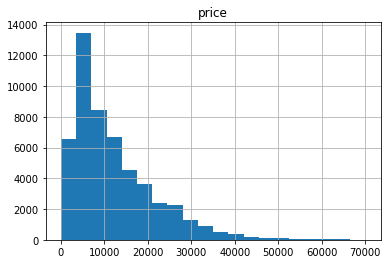

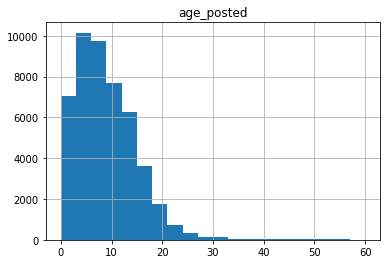

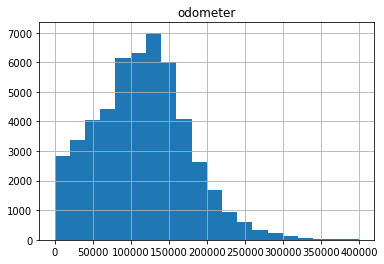

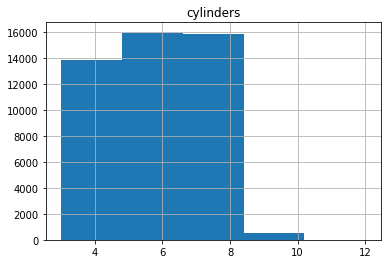

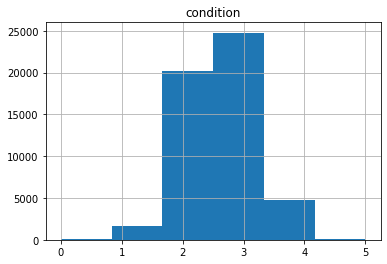

In [35]:
data['price'].hist(bins=20, range=(0, 70000))
#plots a histogram for the 'price' column with 20 bins and the x-axis ranging from 0 to 70000
plt.title('price')
plt.show()#shows the above histogram

data['age_posted'].hist(bins=20, range=(0, 60))
#plots a histogram for the 'age_posted' column with 20 bins and the x-axis ranging from 0 to 60
plt.title('age_posted')
plt.show()#shows the above histogram

data['odometer'].hist(bins=20, range=(0, 400000))
#plots a histogram for the 'odometer' column with 20 bins
plt.title('odometer')
plt.show()#shows the above histogram

data['cylinders'].hist(bins=5)
#plots a histogram for the 'odometer' column with 5 bins
plt.title('cylinders')
plt.show()#shows the above histogram

data['condition'].hist(bins=6)#plots a histogram for the 'condition' column with 6 bins
plt.title('condition')
plt.show()#shows the above histogram

In the price histogram, the bins start zeroing out and forming a wide base after 40000. In the age_posted histogram, the same thing happens after the age of 30. In the odometer histogram, we start noticing a tail after 250000. There are no real outliers in the other histograms

### Filtered data and new histograms

Let's put all the outliers in a separate dataframe

In [20]:
outlier_data = data.query('price > 40000 & age_posted > 30 & odometer > 250000')
#creates a slice of data where the price is more than 40000, age is more than 30, and
#odometer is more than 250000
outlier_data.info(verbose=True)#general information about dataframe
outlier_data.head()#first 5 rows of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17869 to 17869
Data columns (total 18 columns):
price                 1 non-null int64
model_year            1 non-null float64
model                 1 non-null object
condition             1 non-null int64
cylinders             0 non-null float64
fuel                  1 non-null object
odometer              1 non-null float64
transmission          1 non-null object
type                  1 non-null object
paint_color           1 non-null object
is_4wd                1 non-null bool
date_posted           1 non-null datetime64[ns]
days_listed           1 non-null int64
ad_weekday            1 non-null object
ad_month              1 non-null object
ad_year               1 non-null int64
age_posted            1 non-null float64
avg_yearly_mileage    1 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(4), object(7)
memory usage: 145.0+ bytes


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
17869,59900,1964.0,chevrolet corvette,4,NaN,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,Sunday,June,2018,54.0,18333.333333


Let us also create a dataframe where the outliers are filtered out

In [21]:
filtered_data = data.query('price < 40000 & age_posted < 30 & odometer < 250000')
#creates a slice of data where the price is less than 40000, age is less than 30, and
#odometer is less than 250000
filtered_data.info(verbose=True)#general information about dataframe
filtered_data.head()#first 5 rows of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45806 entries, 0 to 51524
Data columns (total 18 columns):
price                 45806 non-null int64
model_year            45806 non-null float64
model                 45806 non-null object
condition             45806 non-null int64
cylinders             41125 non-null float64
fuel                  45806 non-null object
odometer              45806 non-null float64
transmission          45806 non-null object
type                  45806 non-null object
paint_color           37547 non-null object
is_4wd                45806 non-null bool
date_posted           45806 non-null datetime64[ns]
days_listed           45806 non-null int64
ad_weekday            45806 non-null object
ad_month              45806 non-null object
ad_year               45806 non-null int64
age_posted            45806 non-null float64
avg_yearly_mileage    45805 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(4), object(7)
memory usage: 6.3+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4.0,14488.500000


Now let us plot histograms for the same parameters for our filtered table

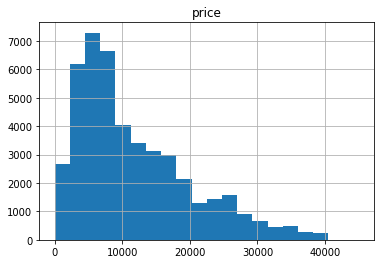

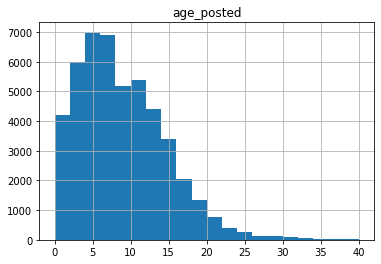

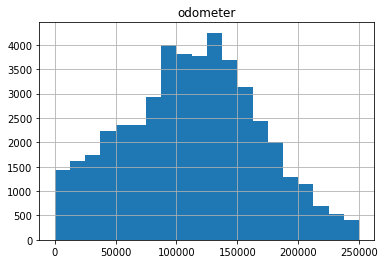

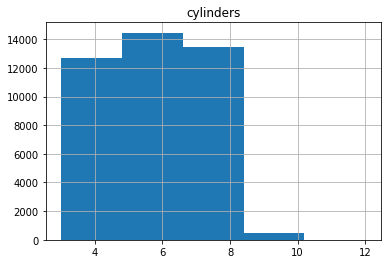

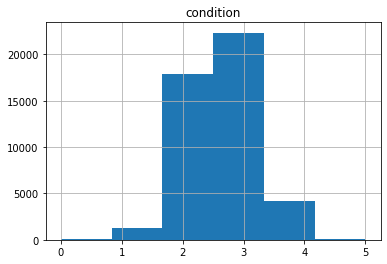

In [22]:
filtered_data['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()
data['age_posted'].hist(bins=20, range=(0, 40))
plt.title('age_posted')
plt.show()
filtered_data['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()
filtered_data['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()
filtered_data['condition'].hist(bins=6)
plt.title('condition')
plt.show()

The new price histogram peaks at 5000, after which there's a steady decrease even though there is a second smaller peak around 25000. The new age histogram peaks at 5, after which there is a steady decrease even though there is a second peak at 10. In the new odometer histogram, the peak is around 125000; the minor peak comes earlier this time at 100000. The main difference between the price, age and odometer from filtered_data and those from the original data set is that the newer histograms have more noise since they are dealing with more limited set of values. Also, the tails are gone. But they have the same peaks.

### Studying 'days_listed'

Let's find the mean and median by applying the describe() method to the column

In [23]:
filtered_data['days_listed'].describe()

count    45806.000000
mean        39.564795
std         28.219065
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean is about 39 days and the median is 33. Let us now plot the histogram

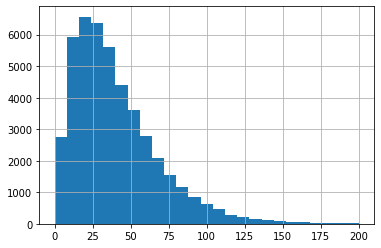

In [24]:
filtered_data['days_listed'].hist(bins=25, range=(0, 200))
plt.show()

To describe the typical lifetime of an ad, let us make a boxplot

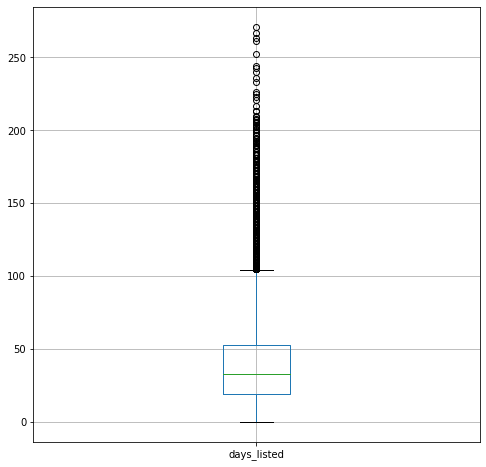

In [25]:
filtered_data.boxplot(column='days_listed', figsize=(8,8))
plt.show()

A typical ad lasts between 19 and around 50 days. Anything abnormally long would be over 100 days. Anything between 0 and 19 can be considered taken down too quick.

### Analyzing the number of ads and the average price for each type of vehicle.

To do so, we will need join two tables: one showing the different types with their median prices, and the other showing the different types with the number of ads for each type. For the 1st one, we can make a pivot table:

In [26]:
type_price_stat=filtered_data.pivot_table(index='type', values='price', aggfunc='median')
#creates a pivot table from our filtered data with the 'type' as index and median price values

type_price_stat

,price
type,
bus,10500
convertible,11000
coupe,12995
hatchback,5995
mini-van,6500
offroad,11850
other,8900
pickup,14900
sedan,5997


For the second one, we can just create a dataframe by applying the value_counts() method to the 'type' column

In [27]:
type_ads_stat=filtered_data['type'].value_counts()
#this creates a data frame using the types as index and their individual counts as column values
type_ads_stat

suv            11148
sedan          11147
truck          10750
pickup          6051
coupe           1943
wagon           1389
mini-van        1058
hatchback        944
van              579
convertible      359
other            222
offroad          192
bus               24
Name: type, dtype: int64

Now we can join both tables with the join() method. Since the type is the index in both tables, all values will position themselves automatically with their corresponding indices. We will also rename the columns as 'price' and 'ads'

In [28]:
type_stat=type_price_stat.join(type_ads_stat)
#joins the 2 tables we created to form a table called type_stat
type_stat.columns = ['price', 'ads']
#renames the columns to 'price' and 'ads'
type_stat = type_stat.sort_values('ads', ascending=False)
#this sorts the values in our new table in descending order of number of ads
type_stat

,price,ads
type,,
suv,8900,11148
sedan,5997,11147
truck,14995,10750
pickup,14900,6051
coupe,12995,1943
wagon,7900,1389
mini-van,6500,1058
hatchback,5995,944
van,7995,579


The most popular types are SUVs and sedans

### What impacts price most

Let us take the 2 most popular types and study them. For each, we will create a slice and focus on price, age, mileage, condition, transmission and paint color. First, SUVs.

In [29]:
suv_data = filtered_data.query('type == "suv"')
#creates a slice of rows where the type is SUV
suv_data = suv_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
#specifies the rows we want in our new table
suv_data = suv_data.reset_index(drop=True)
#this resets the index after slicing
suv_data.head()#first 5 rows of our new table

,price,age_posted,odometer,condition,transmission,paint_color
0,9400,7.0,145000.0,2,automatic,NaN
1,15990,6.0,109473.0,3,automatic,black
2,11500,6.0,104174.0,3,automatic,NaN
3,9200,11.0,147191.0,3,automatic,blue
4,12990,10.0,132285.0,3,automatic,black


Now let's make boxplots comparing price against transmission and paint_color, and scatterplots for the rest

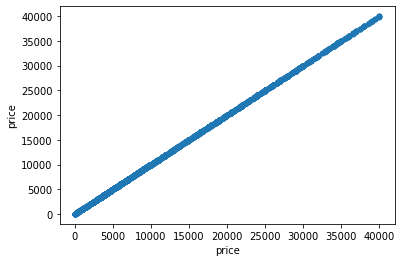

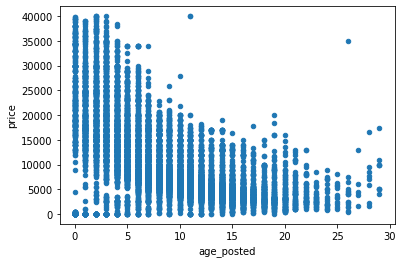

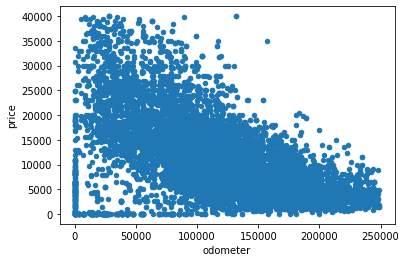

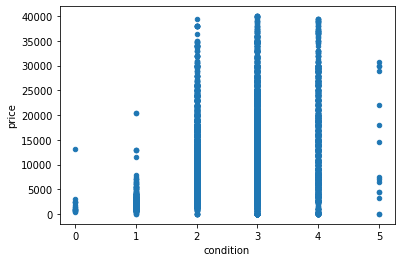

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


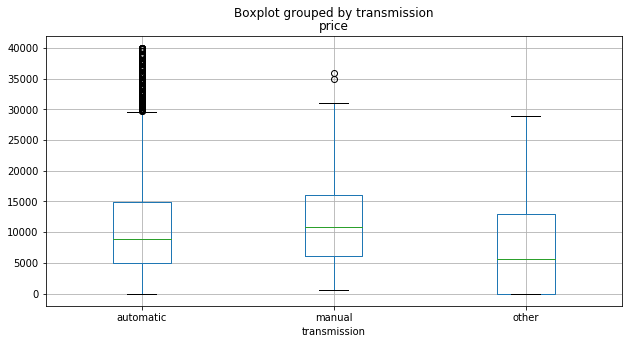

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


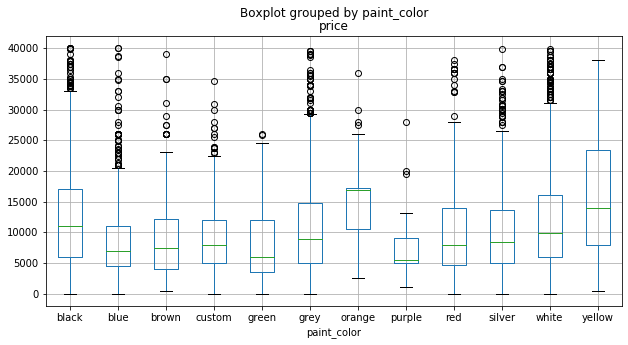

In [30]:
for col in suv_data.columns: #loops through the column names in the list of columns
    if (col == 'transmission')|(col == 'paint_color'):#if the column is transmission or paint_color
        suv_data.boxplot(column='price', by=col, figsize=(10, 5))
        #create a 10 by 5in. boxplot comparing it against the price 
        plt.show()#show the above diagram
        
    else:#for the rest
        suv_data.plot(x=col, y='price', kind='scatter')#create a scatterplot comparing against price
        plt.show()#show the above diagram

Let us also make a correlation matrix. A value closer to 1 or -1 shows a strong dependency, positive or negative. Closer to zero means there is little to no correlation or it can't be expressed in linear form

In [31]:
suv_data.corr()#displays correlation matrix for the suv_data table

,price,age_posted,odometer,condition
price,1.000000,-0.595403,-0.536824,0.269194
age_posted,-0.595403,1.000000,0.641408,-0.323493
odometer,-0.536824,0.641408,1.000000,-0.342875
condition,0.269194,-0.323493,-0.342875,1.000000


From the correlation matrix, the age is the factor that impacts price most, followed by the odometer reading. The condition has little or no correlation or a correlation that can be expressed in linear form. From the boxplots, yellow SUVs and manual transmission SUVs had higher typical prices in their respective categories. Now let us do the same thing for sedans.

In [32]:
sedan_data = filtered_data.query('type == "sedan"')
sedan_data = sedan_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
sedan_data = sedan_data.reset_index(drop=True)
sedan_data.head()

,price,age_posted,odometer,condition,transmission,paint_color
0,5500,6.0,110000.0,4,automatic,red
1,14900,2.0,80903.0,3,automatic,black
2,14990,4.0,57954.0,3,automatic,black
3,12990,3.0,79212.0,3,automatic,white
4,8990,7.0,111142.0,3,automatic,grey


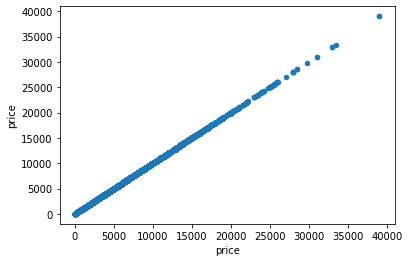

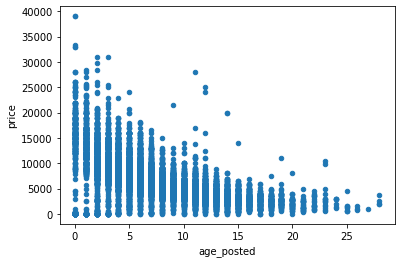

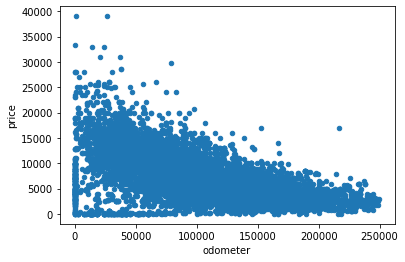

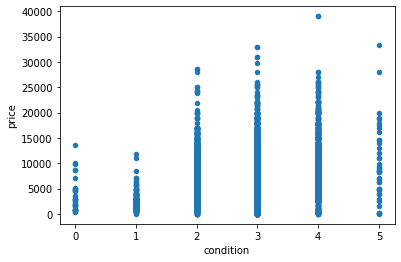

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


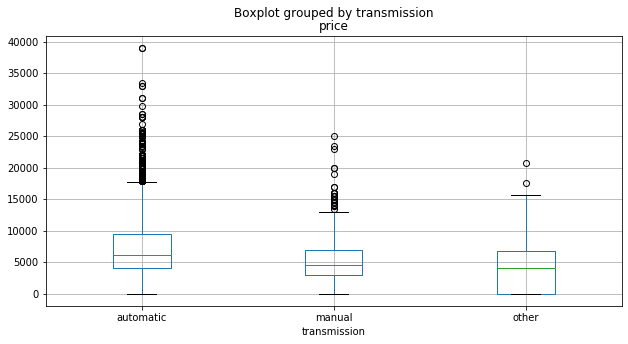

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


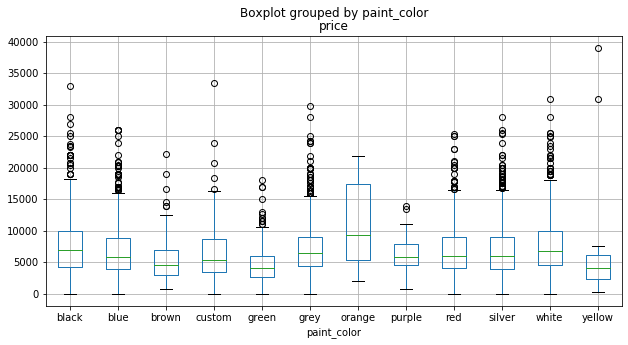

In [33]:
for col in sedan_data.columns:
    if (col == 'transmission')|(col == 'paint_color'):
        sedan_data.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
    else:
        sedan_data.plot(x=col, y='price', kind='scatter')
        plt.show()

In [34]:
sedan_data.corr()

,price,age_posted,odometer,condition
price,1.000000,-0.632892,-0.566062,0.291499
age_posted,-0.632892,1.000000,0.637483,-0.307002
odometer,-0.566062,0.637483,1.000000,-0.340936
condition,0.291499,-0.307002,-0.340936,1.000000


From the correlation matrix, the age still has the strongest correlation with price, followed by odometer (both negative). Condition has little to no correlation with price, or a correlation that cannot be expressed linearly. From the box plots, orange sedans and automatic transmission sedans had the highest typical prices in their respective categories

## Overall conclusion <a name='step5'></a>

We plotted histograms for our original dataset and and filtered data. We saw that the typical ad lasts between 19 and 50 days, and those lasting more than 100 days are abnormally long. We took the two types of vehicles with the highest number of ads to create boxplots, scatterplots, and correlation matrices. From those, we came to the conclusion that the factor that impacts price the most is age, followed by mileage. We also saw that for SUVs, yellow was the color with the highest typical prices, and manual transmission edges out automatic transmission for prices. For sedans (the second most popular type in our dataset), orange was the color that drove up typical prices, and automatic transmission was listed for more than manual transmission